In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
class K_means:
    def __init__(self,data,):
        self.X_train=train_data.to_numpy()
        self.X_train=(self.X_train-np.mean(self.X_train,axis=0))/np.std(self.X_train,axis=0)

    def random_initialization(self,X,K):
        rand_indices=np.random.permutation(X)
        rand_centroids=rand_indices[0:K,:]
        return rand_centroids

    def closest_centroids(self,X,centroids):
        K=centroids.shape[0]
        distances=np.zeros((X.shape[0],K))
        for k in range(K):
            distances[:,k]=np.sum((X-centroids[k,:])**2,axis=1)
        indices=np.argmin(distances,axis=1)
        return distances,indices

    def update_centroids(self,X,indices,K):
        centroids=np.zeros((K,X.shape[1]))
        for k in range(K):
            pts=X[indices==k]
            centroids[k]=np.sum(pts,axis=0)/len(pts)
        return centroids

    def distortion(self,dist):
        cost=np.sum(np.min(dist,axis=1))
        return cost

    def run(self,X,K,num_iters,J_hist):
        centroids=self.random_initialization(X,K)
        dist=self.closest_centroids(X,centroids)[0]
        J_hist.append(self.distortion(dist))
        for i in range(num_iters):
            dist,idx=self.closest_centroids(X,centroids)
            centroids=self.update_centroids(X,idx,K)
            J_hist.append(self.distortion(dist))
        J_hist.append(self.distortion(dist))
        return centroids,idx,J_hist        

In [6]:
train_data=pd.read_csv('Kmean_dataset.csv')
train_data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
model=K_means(train_data)

In [17]:
centroids=[]
J_K=[]
for j in range(1,10):
    J_hist=[]
    c,idx,J_hist=model.run(X_train,j,100,J_hist)
    J_K.append(J_hist[-1])

Text(0, 0.5, 'Cost')

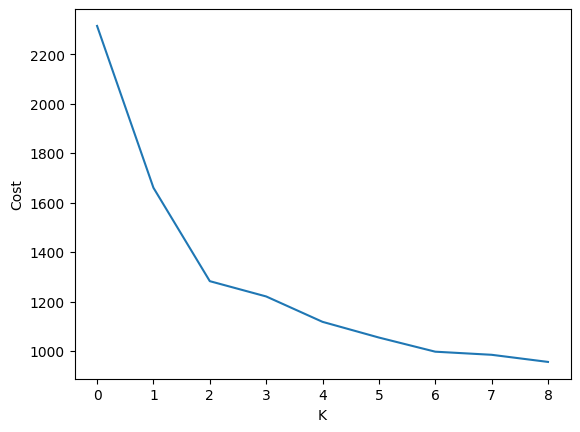

In [20]:
plt.plot(J_K)
plt.xlabel('K')
plt.ylabel('Cost')

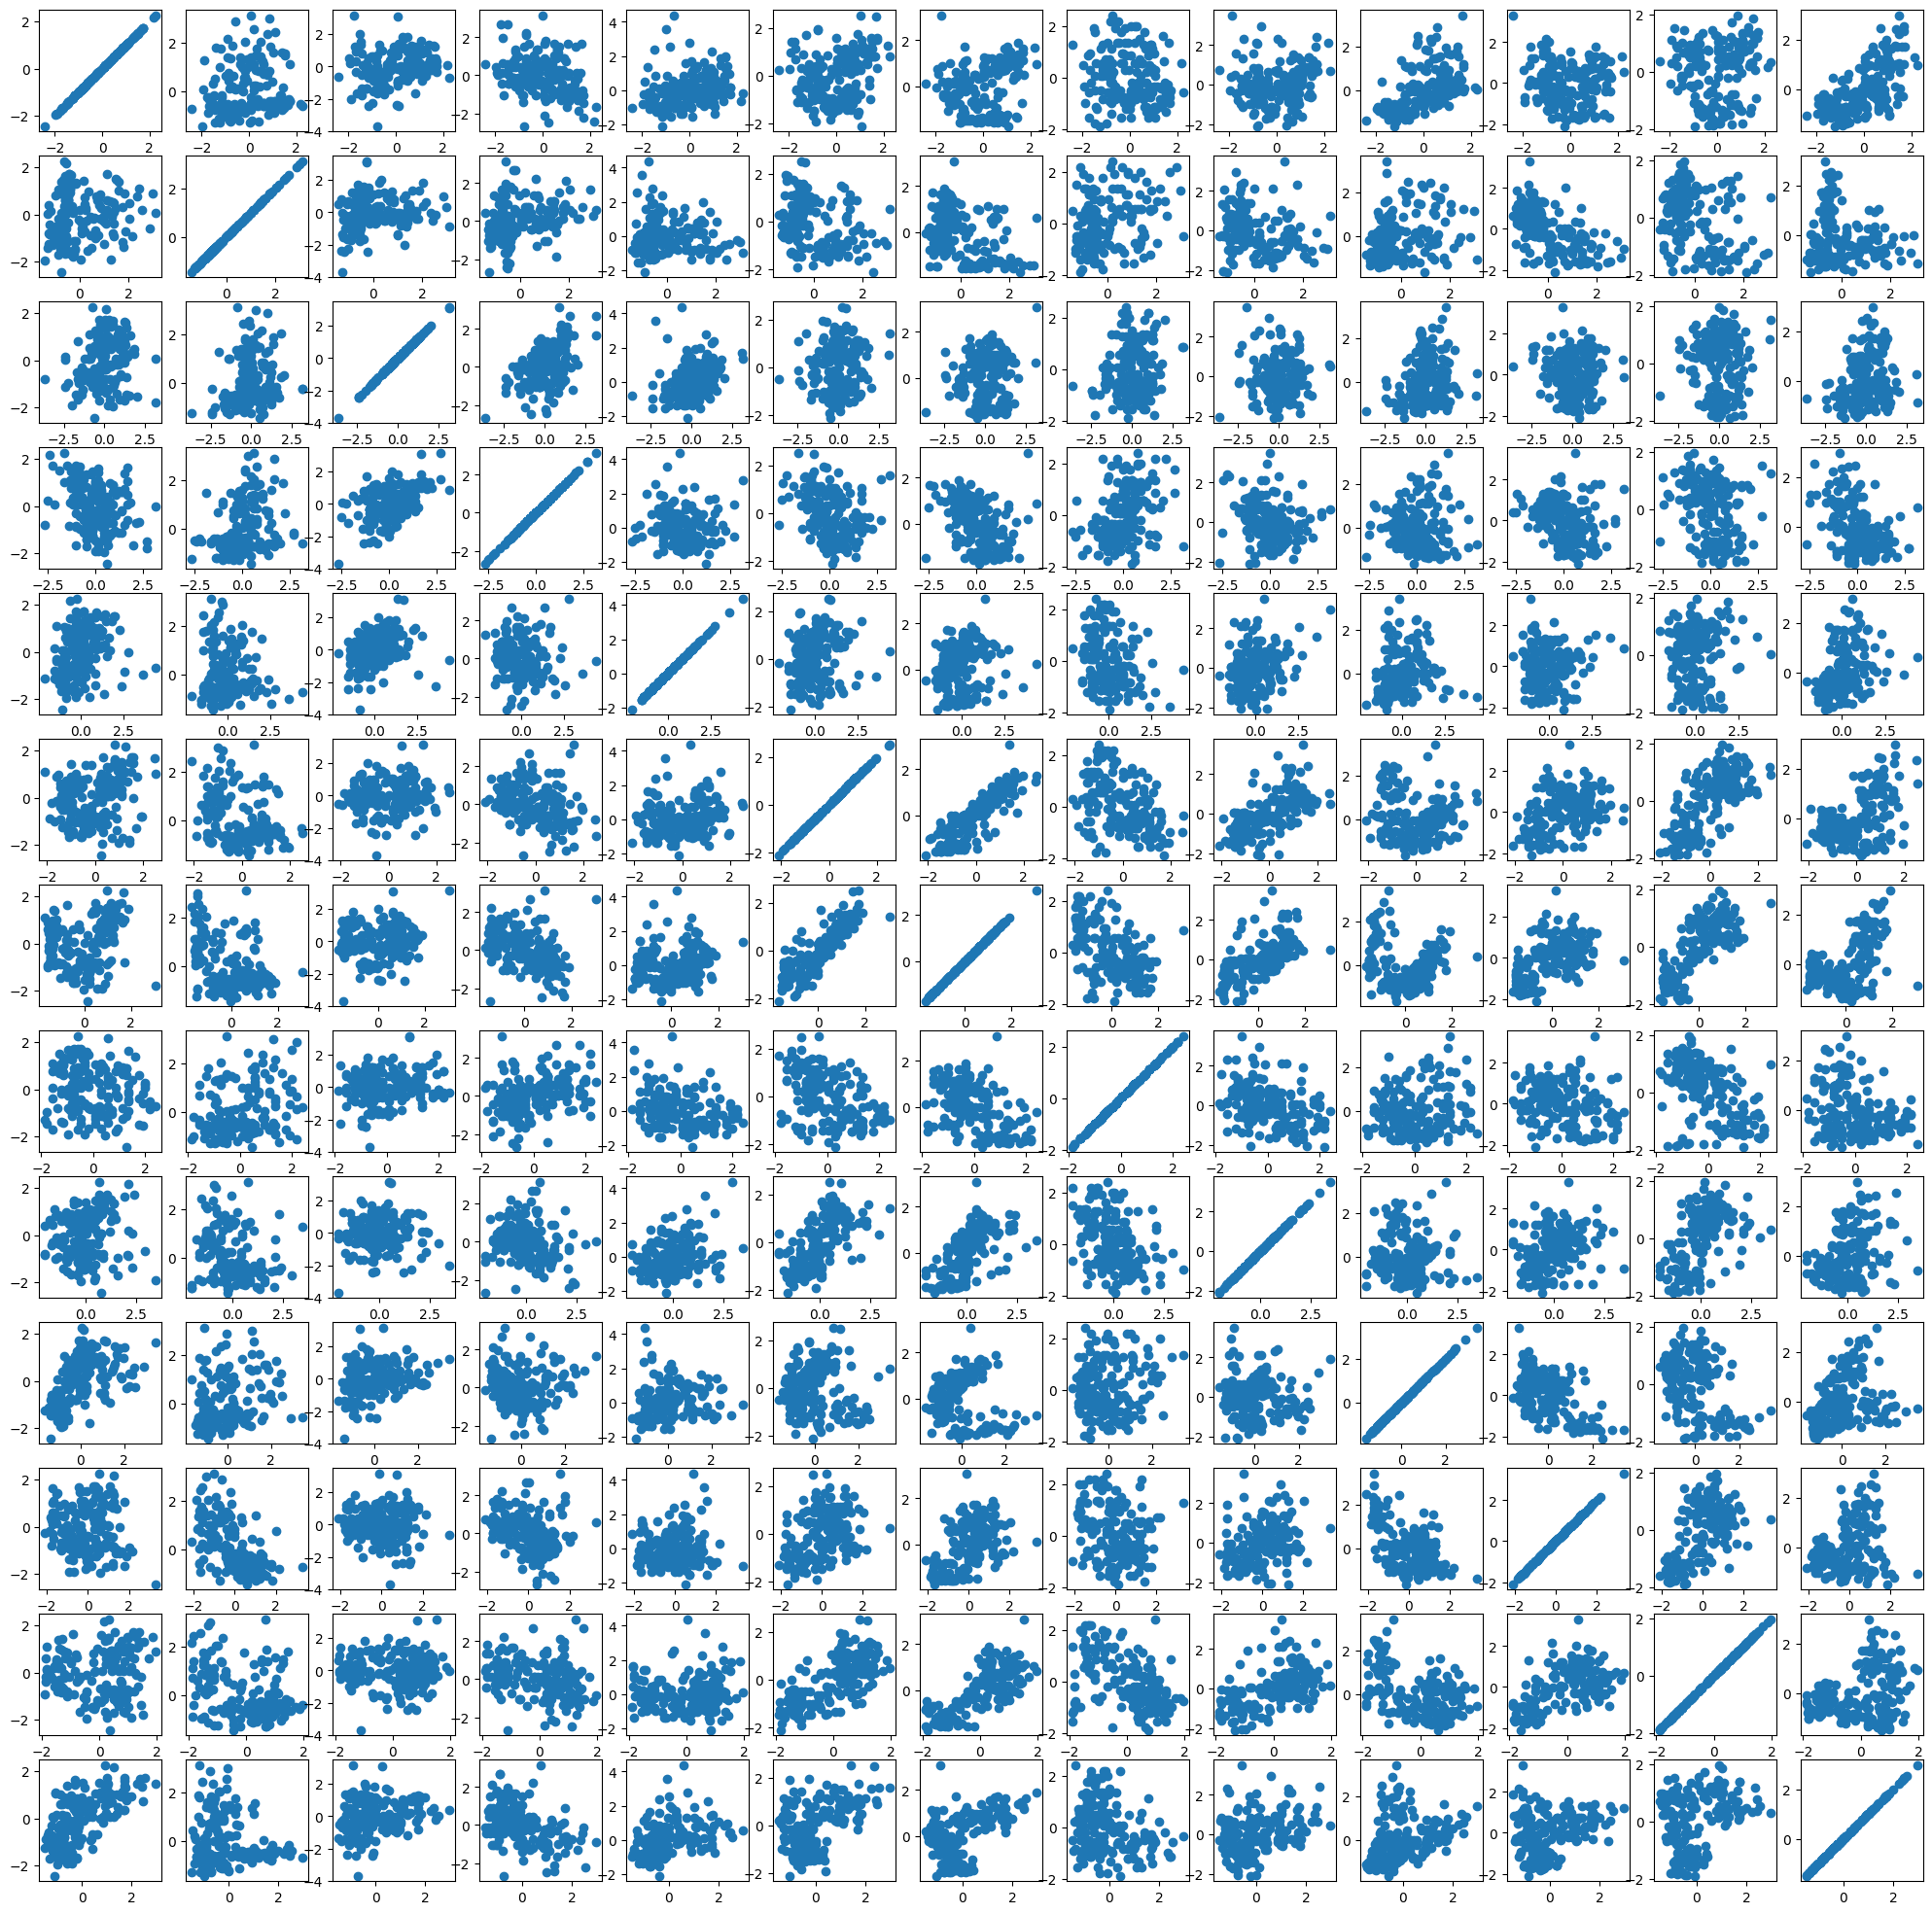

In [19]:
fig,axis=plt.subplots(nrows=13,ncols=13,figsize=(25,25))
for i in range(13):
    for j in range(13):
        axis[i,j].scatter(X_train[:,i],X_train[:,j])